# import pandas as pd
import numpy as np
import tensorflow as tf

raw_train_data = pd.read_csv('garbage/titanic/train.csv')
raw_test_data = pd.read_csv('garbage/titanic/test.csv')

example = pd.read_csv('garbage/titanic/gender_submission.csv')

print(example.head())

In [20]:
x = raw_test_data.columns.unique()
print(x)

target=raw_train_data.Survived

raw_train_data.std()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

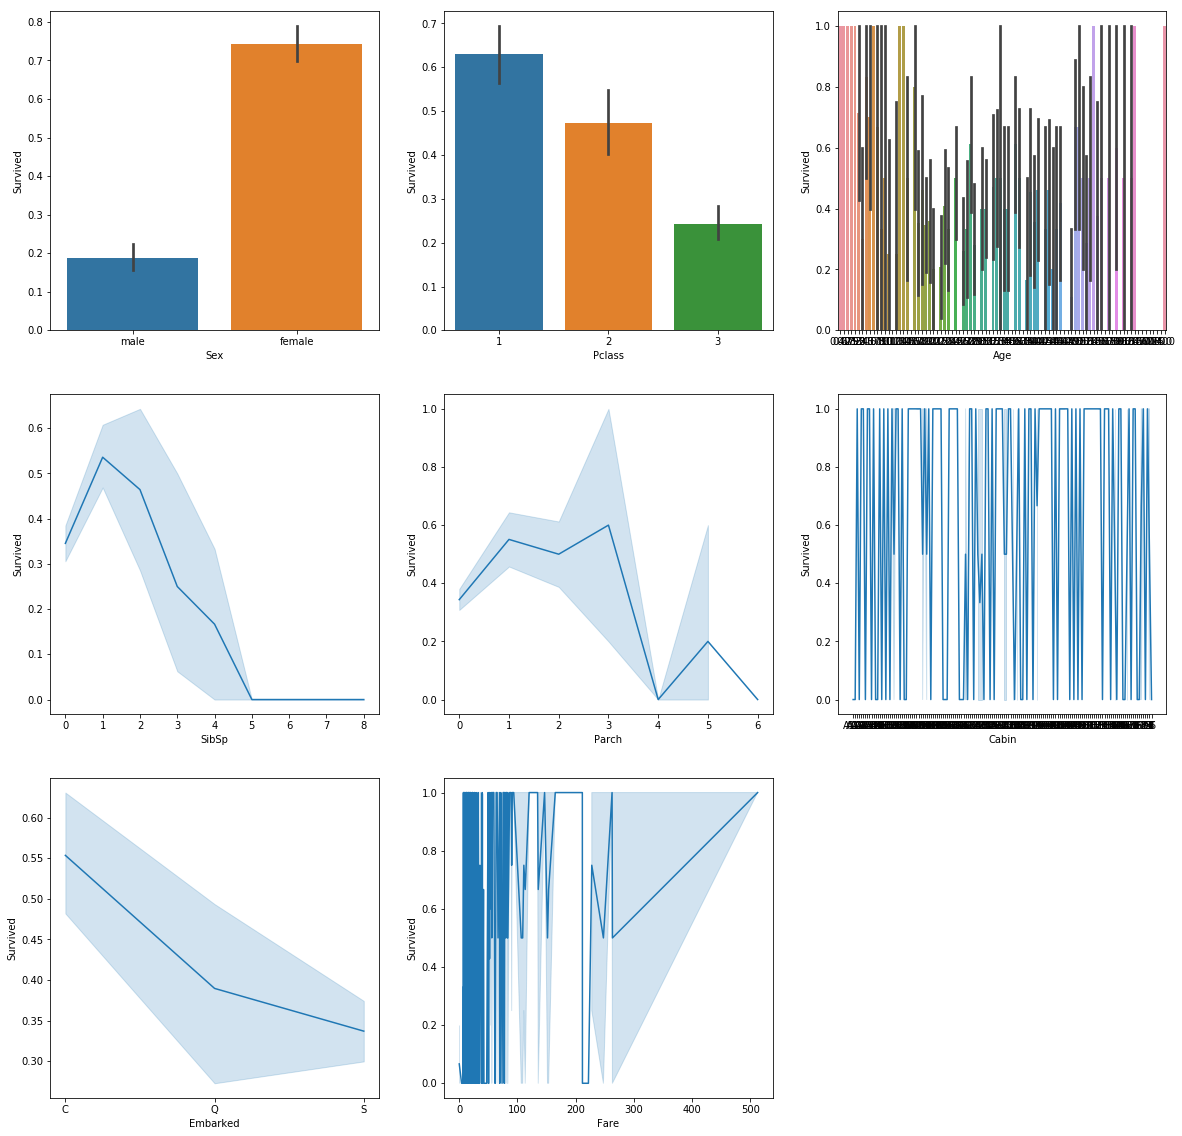

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
plt.subplot(331)
sns.barplot(x = raw_train_data.Sex, y = target)

plt.subplot(332)
sns.barplot(x = raw_train_data.Pclass, y = target)

plt.subplot(333)
sns.barplot(x = raw_train_data.Age, y = target)

plt.subplot(334)
sns.lineplot(x = raw_train_data.SibSp, y = target)

plt.subplot(335)
sns.lineplot(x = raw_train_data.Parch, y = target)

plt.subplot(336)
sns.lineplot(x = raw_train_data.Cabin, y = target)

plt.subplot(337)
sns.lineplot(x = raw_train_data.Embarked, y = target)

plt.subplot(338)
sns.lineplot(x = raw_train_data.Fare, y = target)

In [1]:
import random 
for _ in range(100):
    print(random.randint(1,100))

19
79
29
24
54
6
32
26
21
59
58
98
87
18
68
16
2
53
2
31
31
5
45
39
57
26
17
95
11
43
44
94
88
33
23
69
48
21
32
72
49
24
26
36
19
26
18
48
47
97
31
88
16
91
83
5
20
13
36
95
14
70
23
79
41
95
14
34
42
24
85
81
60
36
89
2
7
6
44
87
26
72
93
58
79
38
69
57
85
78
76
23
75
36
6
63
52
23
39
74


In [27]:
features = ['Sex','Pclass','Age','SibSp','Parch','Embarked','Fare']

X = raw_train_data[features]
X_test = raw_test_data[features]
X.head()
X.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
X.Sex[X.loc[X.Sex == 'female'].index]  = 0


C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Assessioner\Anaconda3\lib\site-packages\pandas\core\series.py:1079: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
C:\Users\Assessioner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, 

In [37]:
X.Sex[X.loc[X.Sex == 'male'].index]=1

C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
X.Embarked[X.loc[X.Embarked == 'S'].index] = 0
X.Embarked[X.loc[X.Embarked == 'C'].index] = 1
X.Embarked[X.loc[X.Embarked == 'Q'].index] = 2

X_test.Sex[X_test.loc[X_test.Sex == 'female'].index] = 0
X_test.Sex[X_test.loc[X_test.Sex == 'male'].index] = 1
X_test.Embarked[X_test.loc[X_test.Embarked == 'S'].index] = 0
X_test.Embarked[X_test.loc[X_test.Embarked == 'C'].index] = 1
X_test.Embarked[X_test.loc[X_test.Embarked == 'Q'].index] = 2

C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Assessioner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C

In [41]:
print(X.columns)

Index(['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare'], dtype='object')


In [58]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

impute_X = pd.DataFrame(imputer.fit_transform(X))
impute_X_test = pd.DataFrame(imputer.transform(X_test))

impute_X.columns = X.columns
impute_X_test.columns = X_test.columns

In [61]:
miu = impute_X.values.mean()
sigma =  impute_X.values.std()
impute_X = impute_X.applymap(lambda x:(x-miu)/sigma)
impute_X_test = impute_X_test.applymap(lambda x:(x - miu)/sigma) 
impute_X.head()

,Sex,Pclass,Age,SibSp,Parch,Embarked,Fare
0,-0.356051,-0.271745,0.529163,-0.356051,-0.398204,-0.398204,-0.092594
1,-0.398204,-0.356051,1.203611,-0.356051,-0.398204,-0.356051,2.606602
2,-0.398204,-0.271745,0.697775,-0.398204,-0.398204,-0.398204,-0.064141
3,-0.398204,-0.356051,1.077152,-0.356051,-0.398204,-0.398204,1.840121
4,-0.356051,-0.271745,1.077152,-0.398204,-0.398204,-0.398204,-0.058872


In [75]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(impute_X, target, test_size=0.2)
print(xtrain.shape)
print(ytrain.shape)

(712, 7)
(712,)


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
rfc = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=10)
rc_param = {
    "max_depth":[None],
    "max_features":[1,3,7],
    'min_samples_split':[2,3,7],
    "min_samples_leaf": [1, 3, 7],
    "bootstrap": [False],
    "n_estimators" :[100,300],
    "criterion": ["gini"]
}

gsgbc = GridSearchCV(rfc, param_grid=rc_param, cv=kfold, scoring='accuracy',n_jobs=4, verbose=1)

gsgbc.fit(xtrain, ytrain)

gbc_best = gsgbc.best_estimator_
print(gbc_best)
print(gsgbc.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   22.7s


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   29.4s finished


AttributeError: 'GridSearchCV' object has no attribute 'best_score'

In [78]:

print(gsgbc.best_score_)

0.8300561797752809


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('garbage/family_data.csv')
sample = pd.read_csv('garbage/sample_submission.csv')
MAX_CHOICE = 5
data['assigned_day'] = sample['assigned_day']
print(data.head())

print(np.unique(data['n_people']))
penalties = {n: [0, 50, 50 + 9 * n, 100 + 9 * n, 200 + 9 * n, 200 + 18 * n, 300 + 18 * n, 300 + 36 * n, 400 + 36 * n, 500 + 36 * n + 199 * n] for n in np.unique(data['n_people'])}


n = data.iloc[4999]['n_people']
print(n)

mat = data[['choice_0','choice_1','choice_2','choice_3','choice_4','choice_5','choice_6','choice_7','choice_8','choice_9',]].to_numpy()
print(mat.shape)



   family_id  choice_0  choice_1  choice_2  choice_3  choice_4  choice_5  \
0          0        52        38        12        82        33        75   
1          1        26         4        82         5        11        47   
2          2       100        54        25        12        27        82   
3          3         2        95         1        96        32         6   
4          4        53         1        47        93        26         3   

   choice_6  choice_7  choice_8  choice_9  n_people  assigned_day  
0        64        76        10        28         4           100  
1        38         6        66        61         4            99  
2        10        89        80        33         3            98  
3        40        31         9        59         2            97  
4        46        16        42        39         4            96  
[2 3 4 5 6 7 8]
4
(5000, 10)


In [2]:
family_size_dict = data[['n_people']].to_dict()['n_people']
cols = [f'choice_{i}' for i in range(10)] 
choice_dict = data[cols].T.to_dict()
N_DAYS = 100
MAX_OCCUPANCY = 300
MIN_OCCUPANCY = 125

days = list(range(N_DAYS,0,-1))
family_size_ls = list(family_size_dict.values())
choice_dict_num = [{vv:i for i,vv in enumerate(di.values())} for di in choice_dict.values()]
best = data['assigned_day']


In [6]:
import pandas as pd

s = pd.read_csv('garbage/bestscore12.csv')
s = s['0']
best = s.astype('int32')

In [7]:


chromosomes = [0 for i in range(500000)]

for i in range(5000):
    chromosomes[i*100 + best[i] - 1] = 1
population = []
population.append(chromosomes)


In [8]:
penalties_dict = {
    n: [
        0,
        50,
        50 + 9 * n,
        100 + 9 * n,
        200 + 9 * n,
        200 + 18 * n,
        300 + 18 * n,
        300 + 36 * n,
        400 + 36 * n,
        500 + 36 * n + 199 * n,
        500 + 36 * n + 398 * n
    ]
    for n in range(max(family_size_dict.values())+1)
}
    
def cost_function(prediction):
    penalty = 0

    # We'll use this to count the number of people scheduled each day
    daily_occupancy = {k:0 for k in days}
    
    # Looping over each family; d is the day, n is size of that family, 
    # and choice is their top choices
    for n, d, choice in zip(family_size_ls, prediction, choice_dict_num):
        # add the family member count to the daily occupancy
        daily_occupancy[d] += n

        # Calculate the penalty for not getting top preference
        if d not in choice:
            penalty += penalties_dict[n][-1]
        else:
            penalty += penalties_dict[n][choice[d]]

    # for each date, check total occupancy
    #  (using soft constraints instead of hard constraints)
    for v in daily_occupancy.values():
        if (v > MAX_OCCUPANCY) or (v < MIN_OCCUPANCY):
            penalty += 100000000

    # Calculate the accounting cost
    # The first day (day 100) is treated special
    accounting_cost = (daily_occupancy[days[0]]-125.0) / 400.0 * daily_occupancy[days[0]]**(0.5)
    # using the max function because the soft constraints might allow occupancy to dip below 125
    accounting_cost = max(0, accounting_cost)
    
    # Loop over the rest of the days, keeping track of previous count
    yesterday_count = daily_occupancy[days[0]]
    for day in days[1:]:
        today_count = daily_occupancy[day]
        diff = abs(today_count - yesterday_count)
        accounting_cost += max(0, (daily_occupancy[day]-125.0) / 400.0 * daily_occupancy[day]**(0.5 + diff / 50.0))
        yesterday_count = today_count

    penalty += accounting_cost

    return penalty

In [9]:
import numpy as np
from tensorflow import random
import tensorflow as tf

def convert(chromosomes):
    indexes = []
    for i in range(0, 500000):
        if chromosomes[i] == 1:
            indexes.append((i+1) - (i//100)*100)
            
    return indexes

def selection(population, selection_size, group_size):
    parents = []
    
    for i in range(selection_size):
        minimum = 9999999999999
        
        index = -1
        for t in range(group_size):
            chromosome = np.random.randint(len(population))
            for_test = convert(population[chromosome])
            if cost_function(for_test) < minimum:
                minimum = cost_function(for_test)
                index = chromosome
        parents.append(population[index])
    return parents

def cross_over(p1, p2):
    p = [p1[i] for i in  range(50000)] 
    for i in range(50000, 100000):
        p.append(p2[i])
    for i in range(100000, 150000):
        p.append(p1[i])
    for i in range(150000, 200000):
        p.append(p2[i])
    for i in range(200000, 250000):
        p.append(p1[i])
    for i in range(250000, 300000):
        p.append(p2[i])
    for i in range(300000, 350000):
        p.append(p1[i])
    for i in range(350000, 400000):
        p.append(p2[i])
    for i in range(400000, 450000):
        p.append(p1[i])
    for i in range(450000, 500000):
        p.append(p2[i])
    return p

def mutation(family_mat, chromosome, desired_rate=10):
    family_num = np.random.randint(5000)
    desired_prob = np.random.randint(100)
    if desired_prob < desired_rate:
        new_day = np.random.randint(100)
    else:
        ind = np.random.randint(10)
        new_day = family_mat[family_num][ind]-1
    for i in range(family_num*100, (family_num+1)*100):
        chromosome[i] = 0
    chromosome[family_num*100 + new_day] = 1
    
    return chromosome

def reproduction(family_mat, population, new_gen_size, mutation_rate, num_of_mutation):
    new_gen = []
    for i in range(new_gen_size):
        p1_index = np.random.randint(len(population))
        p2_index = np.random.randint(len(population))
        p = cross_over(population[p1_index], population[p2_index])
        mutation_probablity = np.random.randint(100)
        
        if mutation_probablity > mutation_rate:
            mutation_number = np.random.randint(num_of_mutation)
            for m in range(mutation_number):
                p = mutation(family_mat, p, 10)
                    
                    
        new_gen.append(p)
    return new_gen

def epoch_optimal(population):
    minimum = 9999999999
    chromosome = -1
    
    for i in population:
        test = convert(i)
        if cost_function(test) < minimum:
            chromosome = i
            minimum = cost_function(test)
            
    return chromosome, minimum

In [10]:
population = reproduction(mat, population, 50, 0.25, 50)


In [11]:
print(len(population[0]))

500000


In [43]:
best = -1
best_val = 105163.8446075958

for i in range(20):
    print(i)
    population = selection(population, 25, 5)
    population = reproduction(mat, population, 50, 0.25, 10)
    ind, val = epoch_optimal(population)
    print('Min on epoch: ' + str(val))
    if best_val>val:
        best_val = val
        best = ind

0
Min on epoch: 10450383.696781691
1
Min on epoch: 10431553.117885204
2
Min on epoch: 10424270.387976421
3
Min on epoch: 10404732.006157724
4
Min on epoch: 10390341.629593771
5
Min on epoch: 10378156.068063054
6
Min on epoch: 10359758.696500605
7
Min on epoch: 10344710.617967904
8
Min on epoch: 10328353.114097415
9
Min on epoch: 10314063.129211422
10
Min on epoch: 10298961.717009725
11
Min on epoch: 10285964.007272013
12
Min on epoch: 10269450.570657935
13
Min on epoch: 10254769.486891832
14
Min on epoch: 10242489.919754973
15
Min on epoch: 10224025.182629442
16
Min on epoch: 10207895.441949725
17
Min on epoch: 10186238.728026811
18
Min on epoch: 10174538.661135387
19
Min on epoch: 10158124.177714981


In [44]:
for i in range(50):
    print(i)
    population = selection(population, 25, 5)
    population = reproduction(mat, population, 50, 0.25, 10)
    ind, val = epoch_optimal(population)
    print('Min on epoch: ' + str(val))
    if best_val>val:
        best_val = val
        best = ind

0
Min on epoch: 10141388.188936824
1
Min on epoch: 10132639.373539183
2
Min on epoch: 10111138.585071756
3
Min on epoch: 10091973.32715176
4
Min on epoch: 10085800.805006102
5
Min on epoch: 10078231.765997209
6
Min on epoch: 10063360.512231283
7
Min on epoch: 10046355.883130629
8
Min on epoch: 10018596.611426363
9
Min on epoch: 10006244.653419066
10
Min on epoch: 10002713.35469932
11
Min on epoch: 9986817.88055834
12
Min on epoch: 9971744.979244085
13
Min on epoch: 9953225.654404826
14
Min on epoch: 9937595.874176389
15
Min on epoch: 9922581.604219195
16
Min on epoch: 9916578.791103097
17
Min on epoch: 9897888.818143321
18
Min on epoch: 9886357.921200048
19
Min on epoch: 9875971.439217476
20
Min on epoch: 9861891.835606776
21
Min on epoch: 9848147.670911333
22
Min on epoch: 9832400.488550095
23
Min on epoch: 9822839.596172737
24
Min on epoch: 9802801.273291823
25
Min on epoch: 9784491.338276502
26
Min on epoch: 9770748.32519136
27
Min on epoch: 9761009.192975568
28
Min on epoch: 974847

In [46]:
for i in range(150):
    print(i)
    population = selection(population, 25, 5)
    population = reproduction(mat, population, 50, 0.25, 10)
    ind, val = epoch_optimal(population)
    print('Min on epoch: ' + str(val))
    if best_val>val:
        best_val = val
        best = ind

0
Min on epoch: 9454673.794863965
1
Min on epoch: 9442120.583969787
2
Min on epoch: 9433877.900664309
3
Min on epoch: 9415712.515502535
4
Min on epoch: 9407974.845581476
5
Min on epoch: 9389867.730645286
6
Min on epoch: 9379269.26568126
7
Min on epoch: 9364233.036533505
8
Min on epoch: 9346227.742566835
9
Min on epoch: 9324870.101135032
10
Min on epoch: 9315859.316769138
11
Min on epoch: 9300581.705964018
12
Min on epoch: 9287327.928629683
13
Min on epoch: 9277092.864396213
14
Min on epoch: 9258160.041168746
15
Min on epoch: 9252698.365765052
16
Min on epoch: 9235663.729848104
17
Min on epoch: 9224622.767633433
18
Min on epoch: 9212973.484493041
19
Min on epoch: 9196052.5622105
20
Min on epoch: 9180528.57468844
21
Min on epoch: 9174803.951083597
22
Min on epoch: 9160087.949130291
23
Min on epoch: 9147582.935915677
24
Min on epoch: 9137502.11261806
25
Min on epoch: 9121773.808244424
26
Min on epoch: 9109123.057572061
27
Min on epoch: 9099961.29780979
28
Min on epoch: 9088536.012157595
2

In [49]:
best_val = 7949645.994459777
best=-1
for i in range(500):
    print(i)
    population = selection(population, 25, 5)
    population = reproduction(mat, population, 50, 0.25, 10)
    ind, val = epoch_optimal(population)
    print('Min on epoch: ' + str(val))
    if best_val>val:
        best_val = val
        best = ind

0
Min on epoch: 7750870.963039954
1
Min on epoch: 7749789.106786893
2
Min on epoch: 7736362.234221861
3
Min on epoch: 7723133.989501983
4
Min on epoch: 7716870.956306547
5
Min on epoch: 7707468.681697854
6
Min on epoch: 7699318.042926337
7
Min on epoch: 7688430.350467368
8
Min on epoch: 7681736.122955688
9
Min on epoch: 7680331.978344614
10
Min on epoch: 7662914.604629765
11
Min on epoch: 7663903.531320651
12
Min on epoch: 7654786.413261655
13
Min on epoch: 7645008.27265701
14
Min on epoch: 7626450.721490722
15
Min on epoch: 7604460.6640272075
16
Min on epoch: 7595131.933327881
17
Min on epoch: 7585273.433175561
18
Min on epoch: 7584357.264051671
19
Min on epoch: 7567739.22137419
20
Min on epoch: 7567482.846378969
21
Min on epoch: 7554116.155448696
22
Min on epoch: 7546522.5922439415
23
Min on epoch: 7535105.494977329
24
Min on epoch: 7528648.0105336
25
Min on epoch: 7522359.921104017
26
Min on epoch: 7506643.973057864
27
Min on epoch: 7496951.889719396
28
Min on epoch: 7485406.3916994

In [56]:
for i in range(300):
    print(i)
    population = selection(population, 25, 5)
    population = reproduction(mat, population, 50, 25, 10)
    ind, val = epoch_optimal(population)
    print('Min on epoch: ' + str(val))
    if best_val>val:
        best_val = val
        best = ind

0
Min on epoch: 4347934.108501748
1
Min on epoch: 4339967.633058939
2
Min on epoch: 4339967.633058939
3
Min on epoch: 4334475.182808132
4
Min on epoch: 4335060.987526482
5
Min on epoch: 4331961.141952496
6
Min on epoch: 4325755.695715067
7
Min on epoch: 4325755.695715067
8
Min on epoch: 4319941.129761888
9
Min on epoch: 4320453.141091026
10
Min on epoch: 4319336.608372168
11
Min on epoch: 4308006.55543133
12
Min on epoch: 4305192.41158379
13
Min on epoch: 4304333.966640978
14
Min on epoch: 4299225.154077806
15
Min on epoch: 4298402.376730584
16
Min on epoch: 4295491.63942913
17
Min on epoch: 4289486.416627645
18
Min on epoch: 4286322.574331945
19
Min on epoch: 4282402.6713796165
20
Min on epoch: 4277648.001470317
21
Min on epoch: 4275811.93160957
22
Min on epoch: 4269758.677324685
23
Min on epoch: 4265791.9169033645
24
Min on epoch: 4265413.147314116
25
Min on epoch: 4265223.478592727
26
Min on epoch: 4260753.192631909
27
Min on epoch: 4256591.371950311
28
Min on epoch: 4248308.3114922

In [ ]:
best_val = 1290292
best = -1

for i in range(500):
    print('generation '+str(i))
    population = selection(population, 50, 15)
    population = reproduction(mat, population, 50, 0.25, 25)
    ind, val = epoch_optimal(population)
    print('Min on epoch: ' + str(val))
    if best_val>val:
        best_val = val
        best = ind

generation 0


In [16]:

s = convert(best)

sample['assigned_day']=s
sample.to_csv('garbage/bestscore12.csv', index=False)


In [17]:
print(cost_function(s))

1290292.6725250431
